In [79]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

Dataset from kaggle: https://www.kaggle.com/datasets/krishujeniya/heart-diseae/data

## Exploratory Data Analysis

1. Age: age of the patient
2. sex: 1 male, 0 female
3. cp: chess pain type (0 = no chess pain, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
4. trestbps: resting blood pressure (mmHg)
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing
8. thalach: Maximum heart rate achieved
9. exang: Exercise-induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest

11. slope: slope of the peak exercise ST segment. 0: Upsloping, 1: Flat, 2: Downsloping
12. ca: number of major vessels (0–3) colored by fluoroscopy.
13. thal: Thalassemia blood disorder. 1: Fixed defect, 2: Normal, 3: Reversible defect
14. target: whether or not have heart disease (1 = have heart disease, 0 = not have heart disease)

In [50]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
# Remove duplicated data
df.duplicated().sum()
df = df.drop_duplicates().reset_index(drop=True)

In [52]:
# Check missing value
df.info()

missing_values = df.isnull().sum()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### Total data entries is same for all variable so there is no missing value

In [53]:
# Check data type
cat_cols = []
num_cols = []

for i in df.columns:
    # print(str(df[i].dtype))
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: []
Numeric: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


##### All categorical column is already encoded so every column read as numeric
If we read the variable definition, the actual categorical column is sex, cp, fbs, restecg, exang, slope, ca, thal, and target

In [54]:
# Univariate analysis
category = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# listing categorical column
for i in category:
    num_cols.remove(i)
    cat_cols.append(i)
print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

df[num_cols].describe()

Categorical: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Numeric: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


In [55]:
# Univariate Analysis (mode)
for i in cat_cols:
    print(df[i].value_counts(),'\n')

sex
1    206
0     96
Name: count, dtype: int64 

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64 

fbs
0    257
1     45
Name: count, dtype: int64 

restecg
1    151
0    147
2      4
Name: count, dtype: int64 

exang
0    203
1     99
Name: count, dtype: int64 

slope
2    141
1    140
0     21
Name: count, dtype: int64 

ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64 

thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64 

target
1    164
0    138
Name: count, dtype: int64 



From data above, we know 'Target' is balanced, that heart disease:non heart disease is 164:138.

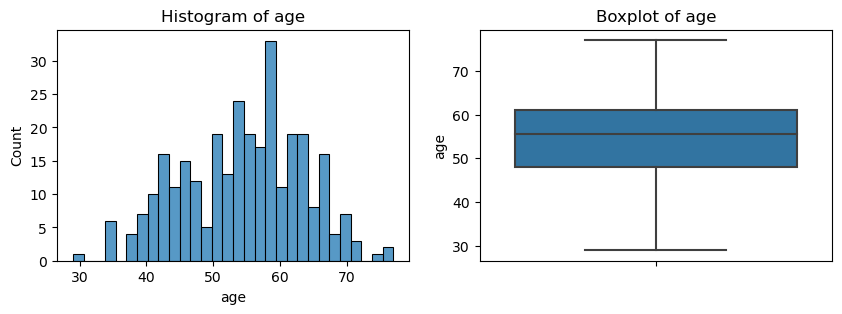

age - Skewness: -0.2037432795959691
age - Kurtosis: -0.5275122997069839


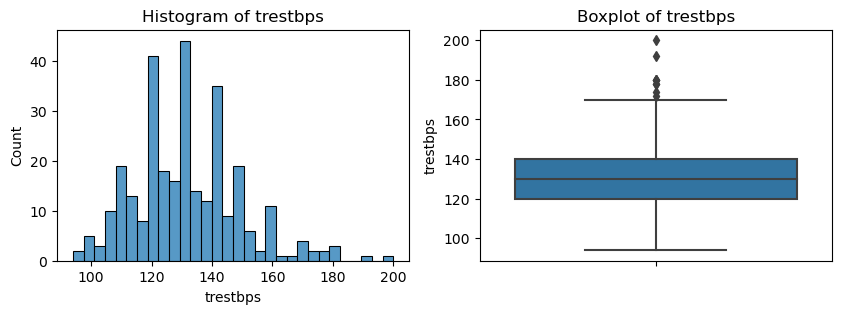

trestbps - Skewness: 0.7165414326647318
trestbps - Kurtosis: 0.9229963552001497


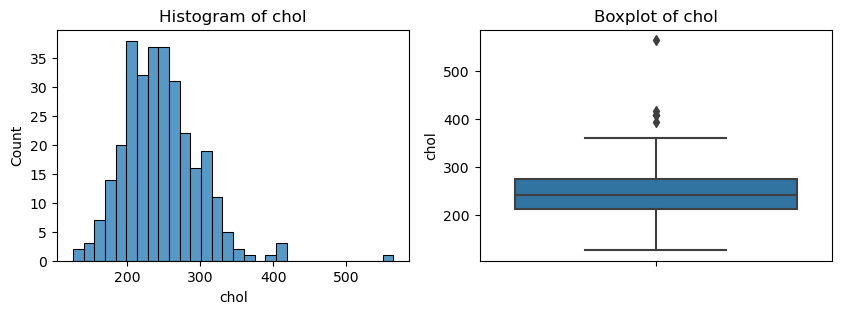

chol - Skewness: 1.147332413980798
chol - Kurtosis: 4.542591352463679


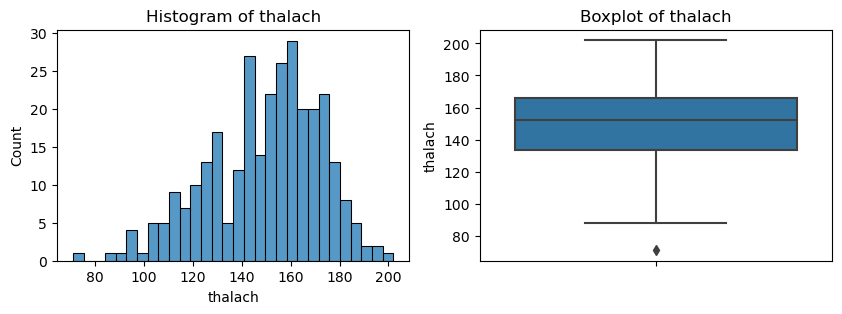

thalach - Skewness: -0.5326712468229611
thalach - Kurtosis: -0.06218631883114689


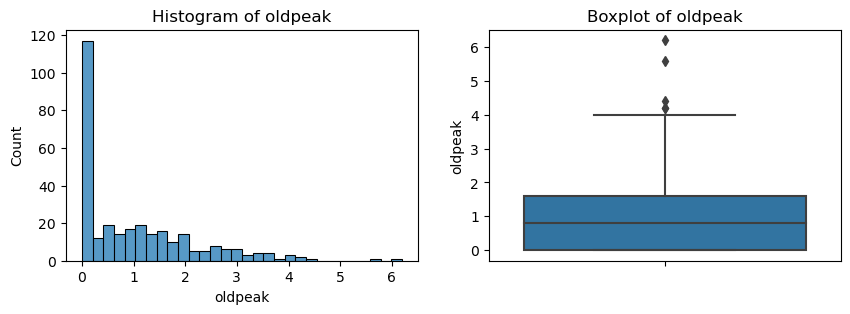

oldpeak - Skewness: 1.2661727209102187
oldpeak - Kurtosis: 1.5678764941867351


In [56]:
# Check outlier and distribution
def check_distribution_outliers(dataframe, numerical):
    for col in numerical:
        plt.figure(figsize=(10, 3))

        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[col], bins=30)
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(y=dataframe[col])
        plt.title(f'Boxplot of {col}')
        
        plt.show()

        print(f'{col} - Skewness: {dataframe[col].skew()}')
        print(f'{col} - Kurtosis: {dataframe[col].kurt()}')
        
check_distribution_outliers(df[num_cols], num_cols)

From the boxplot, we can see there's a few outliers at some variable, but we ignore the outliers because it is make sense, like high resting blood pressure (trestbps), cholesterol (chol), etc.

In [57]:
# check distribution
for i in num_cols:
    print(i, shapiro(df[i]))

age ShapiroResult(statistic=0.9866365790367126, pvalue=0.0067442781291902065)
trestbps ShapiroResult(statistic=0.9657257199287415, pvalue=1.4189961348165525e-06)
chol ShapiroResult(statistic=0.9465804100036621, pvalue=5.194471519587296e-09)
thalach ShapiroResult(statistic=0.9767903089523315, pvalue=8.265547512564808e-05)
oldpeak ShapiroResult(statistic=0.845220148563385, pvalue=9.988876905490712e-17)


We check the distribution of numerical data with shapiro. From the result, we know all of the numerical data's p value < 0.05, that means there's no normally distributed data in numerical columns. So, later, we scale numerical column with robust scaler, not standar scaler.

#### EDA Summary:
These data contains 165 patient's record that has heart disease and 138 patient's record that has no heart disease, we can say the data is balanced based on the ratio. There are 9 categorical data and 5 numerical data. There is one duplicated data, and there is no missing value in the data. All of the numerical data isn't normally distributed, so we avoid analysis related to mean. There are some outliers in numerical data, but we dont have to handle it, because the outliers is totally make sense. 

## Preprocessing

#### We don't have to do encoding, because all of the categorical column is already encoded and displayed in numerical form.

In [58]:
# Spliting data
x = df[df.columns.drop(['target'])]
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

We move the 'target' to y and split the data to train data and test data with ratio 80:20

In [59]:
# Scaling the numerical column
rob_scaler = RobustScaler()

x_train[num_cols] = rob_scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = rob_scaler.transform(x_test[num_cols])

We scale the numerical data for better model (avoid parametric model). Because all of the numerical column not normally distributed, we scale them using robust scaler. We don't have to scale y, because it's categorical data that encoded to numerical form (0 and 1)

## Train Model
I use Support Vector Machine (SVM) model for this case, because from the information i searched, SVM is good for smaller dataset

In [75]:
# Train the Model
svm_model = SVC(kernel='linear', probability=True)

svm_model.fit(x_train, y_train)

# Use model for prediction
y_pred = svm_model.predict(x_test)
y_prob = svm_model.predict_proba(x_test)[:, 1]

## Evaluate The Model

In [70]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

[[25  4]
 [ 5 27]]


In this case (heart disease prediction), False Negative or FN(1,0) = 5 is more important, because we don't want someone with heart disease labeled has not heart disease. So, we should notice the recall performance.

From the positive recall score, we know 84% of the actual positive case was predicted correctly (positive) and the rest is predicted negative (FN)

From the macro avg, all of the score is 0.85 or 85%, 85% precision means 85% of the positive prediction made by model is actually positive.

We can say it's pretty good score, but we should check the ROC Curve too

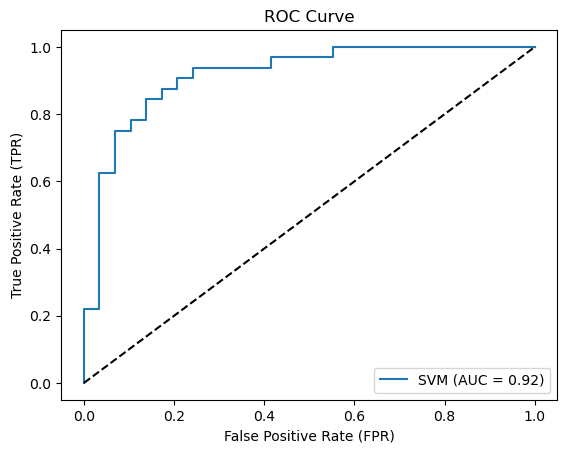

AUC: 0.92


In [78]:
# Make ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Compute AUC
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc:.2f}')

From the ROC and AUC score, we can conclude that this model is good enough at predicting, not just lucky predict (AUC > 0.9)

## Fine Tuning
### Using GridSearchCV

In [83]:
# Define a parameter grid to tune C and kernel
param_grid = {'C': [0.1, 1, 10, 100], 
              'kernel': ['linear', 'rbf', 'poly'], 
              'gamma': ['scale', 'auto'],
              'probability': [True]}

# Perform grid search with cross-validation (CV = 5)
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(x_train, y_train)

# Best parameters found by GridSearch
print(f"Best parameters: {grid.best_params_}")

# Use the best model to make predictions
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
y_prob = best_model.predict_proba(x_test)[:, 1]

# Evaluate the best model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END C=0.1, gamma=scale, kernel=linear, probability=True; total time=   0.0s
[CV] END C=0.1, gamma=scale, kernel=linear, probability=True; total time=   0.0s
[CV] END C=0.1, gamma=scale, kernel=linear, probability=True; total time=   0.0s
[CV] END C=0.1, gamma=scale, kernel=linear, probability=True; total time=   0.0s
[CV] END C=0.1, gamma=scale, kernel=linear, probability=True; total time=   0.0s
[CV] END ...C=0.1, gamma=scale, kernel=rbf, probability=True; total time=   0.0s
[CV] END ...C=0.1, gamma=scale, kernel=rbf, probability=True; total time=   0.0s
[CV] END ...C=0.1, gamma=scale, kernel=rbf, probability=True; total time=   0.0s
[CV] END ...C=0.1, gamma=scale, kernel=rbf, probability=True; total time=   0.0s
[CV] END ...C=0.1, gamma=scale, kernel=rbf, probability=True; total time=   0.0s
[CV] END ..C=0.1, gamma=scale, kernel=poly, probability=True; total time=   0.0s
[CV] END ..C=0.1, gamma=scale, kernel=poly, pro

### Explanation
GridSearchCV is used to automatically find the best hyperparameters for SVM model by testing different combinations of C, kernel, and gamma. This process helps improve the model’s performance without manual trial and error.

The best parameters found were:
- C=1: A balanced regularization.
- kernel='rbf': A non-linear Radial Basis Function kernel.
- gamma='scale': Determines how far the influence of a single point reaches.
- probability=True just for modify the model so i can compute ROC

And the Best Model Performance is:
1. Precision (Macro avg) : 87% of predicted values from model were correct.
2. Recall (Macro avg): 87% of cases were correctly predicted by model.
3. Recall (for class 1): 91% of actual positives were correctly predicted positive.
4. F1-Score: A balance between precision and recall.

Overall, the model performed well, and IMPORTANTLY the recall score for positive (class 1) is increased to 91%, so the number of False Negative can be reduced. It's important for this case (heart disease), because we don't want positive case predicted Negative by model.

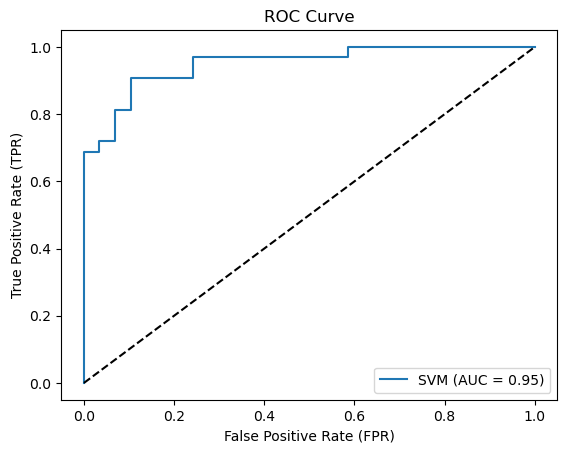

In [84]:
# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

The AUC score is increased too from 0.92 to 0.95, so we can say the model is now slightly better at making correct prediction.